In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import os 
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

`Load Dataframe`

In [2]:
df = pd.read_csv("FINAL_STOCKS.csv")
df.tail()

,date,max_price,min_price,closing,opening,change_pctg,volume,value,n_deals,stock
16530,2014-01-15,0.80,0.79,0.79,0.80,1.27,"1,958","2,188.15",5,Wassel
16531,2014-01-14,0.79,0.79,0.80,0.79,-1.25,480,534.84,4,Wassel
16532,2014-01-12,0.80,0.80,0.82,0.80,-2.44,404,455.85,3,Wassel
16533,2014-01-08,0.82,0.82,0.81,0.82,1.23,200,231.31,2,Wassel
16534,2014-01-06,0.81,0.81,0.85,0.81,-4.71,136,155.37,1,Wassel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16535 entries, 0 to 16534
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         16535 non-null  object 
 1   max_price    16535 non-null  float64
 2   min_price    16535 non-null  float64
 3   closing      16535 non-null  float64
 4   opening      16535 non-null  float64
 5   change_pctg  16535 non-null  float64
 6   volume       16535 non-null  object 
 7   value        16535 non-null  object 
 8   n_deals      16535 non-null  int64  
 9   stock        16535 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()

date           0
max_price      0
min_price      0
closing        0
opening        0
change_pctg    0
volume         0
value          0
n_deals        0
stock          0
dtype: int64

`Reorder columns`

In [5]:
desired_order = ['stock', 'date'] + [ col for col in df.columns if col not in ['stock', 'date'] ]
desired_order

['stock',
 'date',
 'max_price',
 'min_price',
 'closing',
 'opening',
 'change_pctg',
 'volume',
 'value',
 'n_deals']

In [6]:
df = df[desired_order]
df.tail()

,stock,date,max_price,min_price,closing,opening,change_pctg,volume,value,n_deals
16530,Wassel,2014-01-15,0.80,0.79,0.79,0.80,1.27,"1,958","2,188.15",5
16531,Wassel,2014-01-14,0.79,0.79,0.80,0.79,-1.25,480,534.84,4
16532,Wassel,2014-01-12,0.80,0.80,0.82,0.80,-2.44,404,455.85,3
16533,Wassel,2014-01-08,0.82,0.82,0.81,0.82,1.23,200,231.31,2
16534,Wassel,2014-01-06,0.81,0.81,0.85,0.81,-4.71,136,155.37,1


`Datize the date column`

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.dtypes

stock                  object
date           datetime64[ns]
max_price             float64
min_price             float64
closing               float64
opening               float64
change_pctg           float64
volume                 object
value                  object
n_deals                 int64
dtype: object

check stock's date difference between active days

In [8]:
wassel = df[df['stock'] == 'Wassel']
wassel.first_valid_index(), wassel.last_valid_index()

(np.int64(15314), np.int64(16534))

In [9]:
for ind, row in wassel.iloc[0:4].iterrows():
    if ind==15314:
        continue
    prev_row = wassel.iloc[ind - 15315]
    print('row is: ', row['date'])
    print('prev_row is: ', prev_row['date'])
    x = prev_row['date'] - row['date']
    print('difference is: ', x.days)

row is:  2025-11-18 00:00:00
prev_row is:  2025-11-20 00:00:00
difference is:  2
row is:  2025-11-17 00:00:00
prev_row is:  2025-11-18 00:00:00
difference is:  1
row is:  2025-11-12 00:00:00
prev_row is:  2025-11-17 00:00:00
difference is:  5


In [10]:
df.iloc[1]

stock                          AIB
date           2025-11-19 00:00:00
max_price                     1.17
min_price                     1.17
closing                       1.18
opening                       1.17
change_pctg                  -0.85
volume                       1,999
value                     2,338.83
n_deals                          1
Name: 1, dtype: object

`Create difference since last deal column`

remember Friday and Saturday are naturally off days

In [11]:
from create_features import create_time_since_last_trade

In [ ]:
df = create_time_since_last_trade(df)


In [26]:
df[df['stock']=='AIB'].head()

,stock,date,max_price,min_price,closing,opening,change_pctg,volume,value,n_deals,time_since_last
1,AIB,2014-01-05,1.18,1.18,1.20,1.18,-1.67,"6,861","8,095.98",4,3.0
2,AIB,2014-01-08,1.18,1.18,1.18,1.18,0.00,"1,113","1,313.34",2,3.0
3,AIB,2014-01-12,1.16,1.16,1.18,1.16,-1.69,300,348,2,4.0
4,AIB,2014-01-14,1.18,1.16,1.16,1.16,0.00,"1,180","1,388.80",2,2.0
5,AIB,2014-01-16,1.18,1.16,1.16,1.18,1.72,"1,311","1,526.98",4,2.0


`Ensure no missing values`

In [27]:
df['time_since_last'].isna().sum()

np.int64(0)

`The maximum idle time between stocks`

In [29]:
for st in df['stock'].unique():
    stock_df = df[df['stock'] == st]
    print(f"Stock: {st}, Max days between entries: {stock_df['time_since_last'].max()}")


Stock: AIB, Max days between entries: 84.0
Stock: BoP, Max days between entries: 45.0
Stock: GUI, Max days between entries: 147.0
Stock: Isbk, Max days between entries: 46.0
Stock: Wassel, Max days between entries: 182.0
Stock: apic, Max days between entries: 45.0
Stock: bpc, Max days between entries: 51.0
Stock: jph, Max days between entries: 53.0
Stock: oreedo, Max days between entries: 45.0
Stock: trust, Max days between entries: 209.0


```python 
    #all of them are 1 so deleted the line for redundancy in information
    print(f"Stock: {st}, Min days between entries: {stock_df['time_since_last'].min()}")
```

`See which stocks ahs the largest volume and #of trades`

In [30]:
df.dtypes

stock                      object
date               datetime64[ns]
max_price                 float64
min_price                 float64
closing                   float64
opening                   float64
change_pctg               float64
volume                     object
value                      object
n_deals                     int64
time_since_last           float64
dtype: object

`Numerize the (value, volume) columns`

In [31]:
df['value'] = df['value'].str.replace(',', '').astype(float)
df['volume'] = df['volume'].str.replace(',', '').astype(float)

In [ ]:
df[['value','volume']].dtypes

value              float64
volume             float64
time_since_last    float64
dtype: object

In [33]:
df.groupby('stock')['volume'].sum().sort_values(ascending=False).head()

stock
BoP       233278071.0
apic      217714773.0
Isbk      112788959.0
oreedo     70694594.0
AIB        43606571.0
Name: volume, dtype: float64

In [34]:
df.groupby('stock')['n_deals'].sum().sort_values(ascending=False).head()

stock
BoP       44245
apic      33709
oreedo    26051
Isbk      17918
AIB        6692
Name: n_deals, dtype: int64

`Set stock, date as the index`

In [36]:
df.set_index('stock', inplace=True)

In [37]:
df.index.unique()

Index(['AIB', 'BoP', 'GUI', 'Isbk', 'Wassel', 'apic', 'bpc', 'jph', 'oreedo',
       'trust'],
      dtype='object', name='stock')

`Working with individual stocks`

In [38]:
bop = df.loc['BoP', :]
bop.set_index('date', inplace=True)

In [39]:
bop.index

DatetimeIndex(['2014-01-05', '2014-01-06', '2014-01-08', '2014-01-09',
               '2014-01-12', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2025-11-06', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-17', '2025-11-18',
               '2025-11-19', '2025-11-20'],
              dtype='datetime64[ns]', name='date', length=2732, freq=None)

<Axes: xlabel='date'>

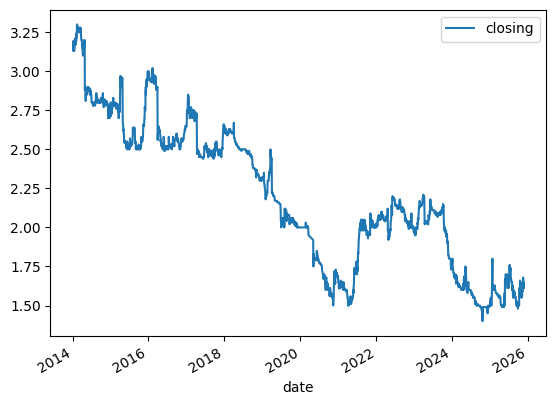

In [40]:
bop.plot.line(y='closing', use_index=True)

##### `After training the intial model and getting 100% on all evaluation metrics foudnout that the change_pctg feature from Palestinian stock market is calculated based on tomorrow's - today's price isntead of today's - yesterday's causing future time series leakage`

In [ ]:
import importlib
import create_features


<module 'create_features' from 'c:\\univ\\ML\\project scraping\\create_features.py'>

In [56]:
importlib.reload(create_features)
from create_features import fix_stock_change_pctg_leakge

In [ ]:
first_time = True
df.groupby(df.index).apply(lambda x:
                        fix_stodf = df.groupby("stock").apply(fix_stock_change_pctg_leakge)
ck_change_pctg_leakge(stock=x)
)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
bop.head()

In [ ]:
bop.sort_values(by='time_since_last', ascending=False).head()

In [ ]:
ord = df.loc['oreedo', :]
ord.set_index('date', inplace=True)
ord.sort_values(by='time_since_last', ascending=False).head()

In [ ]:
bop[['volume', 'value']].corr()

In [ ]:
ord[['volume', 'value']].corr()

`Since we have almost perfect correlation between (volume X value) we can drop the value column `

In [ ]:
df.drop(columns=['value'], inplace=True)
ord.drop(columns=['value'], inplace=True)
bop.drop(columns=['value'], inplace=True)

`The initial model we will try is to predict the direction of the movement for stock`

## 1.1 Creating informative variables

`First of all create the movemetn direction target variable`

In [ ]:
bop['tomorrow'] = bop['closing'].shift(-1)

In [ ]:
bop.head()

`Concerned with evaluating on the target variable as being hte icrease in stock price`

In [ ]:
bop['target'] = (bop['tomorrow'] > bop['closing']).astype(int)
bop.drop(columns=['tomorrow'], inplace=True)


`Standard EDA`

In [ ]:
bop.head()

In [ ]:
bop.describe()

In [ ]:
bop.rename(columns={'max_price':'highest', 'min_price':'lowest'}, inplace=True)
bop.columns

In [ ]:
plt.plot(bop.index, bop['closing'], label='Closing Price')
plt.plot(bop.index, bop['opening'], label='Opening Price', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
df.columns

In [ ]:
# rows

In [ ]:
stocks = df.index.unique()
n = len(stocks)

rows = int(np.ceil(n / 5))       # e.g., 10 stocks → 2 rows
cols = 5                      # grid width

fig, axes = plt.subplots(rows, cols, figsize=(22, 10), sharex=False)
axes = axes.flatten()         # easy indexing

# ----- Loop through stocks -----
for i, stock in enumerate(stocks):
    ax = axes[i]

    sdf = df[df.index == stock].sort_values('date').copy()  # sort chronologically
    
    # Create 200-day moving average (200 trading days, not calendar days)
    sdf['MA200'] = sdf['closing'].rolling(window=200).mean()

    # Plot
    ax.plot(sdf['date'], sdf['closing'], label='Closing Price')
    ax.plot(sdf['date'], sdf['MA200'], label='200-day MA')

    ax.set_title(stock)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()

# Hide unused subplots (if fewer than rows*cols)
for j in range(i+1, rows*cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

`As we can see from the first graph we cacn tell that opening and closing prices are almost always identical indicating the low volatility in PEX in general`

In [ ]:
plt.plot(bop.index, bop['highest'], label='Highest Price')
plt.plot(bop.index, bop['lowest'], label='Lowest Price', alpha=0.5)
plt.legend()
plt.show()

### 1.1.1 20 days Moving Average

In [ ]:
bop['20_day_MA'] = bop['closing'].rolling(window=20).mean()
bop['200_day_MA'] = bop['closing'].rolling(window=200).mean()
bop['50_day_MA'] = bop['closing'].rolling(window=50).mean()
bop['ma_ratio'] = bop['closing'] / bop['200_day_MA']


In [ ]:
plt.plot(bop.index, bop['closing'], label='Closing Price')
plt.plot(bop.index, bop['20_day_MA'], label='20 Day MA', alpha=0.5)
plt.plot(bop.index, bop['200_day_MA'], label='200 Day MA', alpha=0.35)
plt.legend()
plt.show()

In [ ]:
plt.plot(bop.index, bop['closing'], label='Closing Price')
plt.plot(bop.index, bop['50_day_MA'], label='50 Day MA', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
plt.plot(bop.index, bop['closing'], label='Closing Price')
plt.plot(bop.index, bop['200_day_MA'], label='200 Day MA', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
plt.hist(bop['ma_ratio'], label='MA ratio')
plt.legend()
plt.show()

In [ ]:
bop_last_2years = bop[bop.index >= (bop.index.max() - pd.DateOffset(years=2))]

In [ ]:
plt.plot(bop_last_2years.index, bop_last_2years['closing'], label='Closing Price')
plt.plot(bop_last_2years.index, bop_last_2years['20_day_MA'], label='20 Day MA', alpha=0.75)
plt.plot(bop_last_2years.index, bop_last_2years['200_day_MA'], label='200 Day MA', alpha=0.5)
plt.legend()
plt.show()

`This chart makes total sense since PEX ahs very low volatility which is why even the 20MA almost perfectly hugs the closign price`

`MA won't reveal much information and alone is not enough for ML model to revela hideen patterns we need to create more features`

### 1.1.2 Daily stock range

In [ ]:
bop['range'] = bop['highest'] - bop['lowest']

In [ ]:
#bop[['volume', 'range']].corr()

### 1.1.3 X daily returns

In [ ]:
bop['r1'] = bop['closing'].pct_change()
bop['r3'] = bop['closing'].pct_change(3)
bop['r5'] = bop['closing'].pct_change(5)


In [ ]:
plt.hist(bop['r1'], bins=50, alpha=0.75, label='r1')
plt.hist(bop['r3'], bins=50, alpha=0.75, label='r3')
plt.hist(bop['r5'], bins=50, alpha=0.75, label='r5')

plt.legend()
plt.show()

In [ ]:
plt.plot(bop.index, bop['r1'], label='r1')
#plt.plot(bop.index, bop['r3'], label='r3', alpha=0.7)
plt.plot(bop.index, bop['r5'], label='r5', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
bop[['r1', 'r3', 'r5']].corr()

### 1.1.4 volatility X days

In [ ]:
bop['volatility_10d'] = bop['r1'].rolling(10).std()
bop['volatility_20d'] = bop['r1'].rolling(20).std()

In [ ]:
plt.plot(bop.index, bop['volatility_10d'], label='volatility over 10d')
plt.plot(bop.index, bop['volatility_20d'], label='volatility over 20d')
plt.axhline(0.025, linestyle='--', color='red')
plt.legend()
plt.show() 

`For reference comparing BoP with oreedo who is riskier`

In [ ]:
ord['r1'] = ord['closing'].pct_change()
ord['volatility_10d'] = ord['r1'].rolling(10).std()
ord['volatility_20d'] = ord['r1'].rolling(20).std()
plt.plot(ord.index, ord['volatility_10d'], label='volatility over 10d')
plt.plot(ord.index, ord['volatility_20d'], label='volatility over 20d')
plt.legend()
plt.show() 

### 1.1.5 RSI

In [ ]:
delta = bop['closing'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

bop['rsi_14'] = 100 - (100 / (1 + avg_gain / avg_loss))

In [ ]:
plt.plot(bop.index, bop['rsi_14'], label='RSI 14')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold  (30)')
plt.legend()
plt.show()  

In [ ]:
delta = bop['closing'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(7).mean()
avg_loss = loss.rolling(7).mean()

bop['rsi_7'] = 100 - (100 / (1 + avg_gain / avg_loss))

In [ ]:
plt.plot(bop.index, bop['rsi_7'], label='RSI 7')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold  (30)')
plt.legend()
plt.show()  

In [ ]:
delta = bop['closing'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(21).mean()
avg_loss = loss.rolling(21).mean()

bop['rsi_21'] = 100 - (100 / (1 + avg_gain / avg_loss))

In [ ]:
plt.plot(bop.index, bop['rsi_21'], label='RSI 21')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold  (30)')
plt.legend()
plt.show()  

### 1.1.6 Liquidity features

In [ ]:
bop['volume_z'] = (bop['volume'] - bop['volume'].mean()) / bop['volume'].std()
bop['n_deals_change'] = bop['n_deals'].pct_change()

In [ ]:
bop[['volume', 'volume_z']].corr()

In [ ]:
bop.drop(columns=['volume'], inplace=True)

In [ ]:
plt.hist(bop['volume_z'], bins=50, alpha=0.75, label='Volume Z-Score')  
plt.show()

---------------------------------------

In [ ]:
bop['range_norm'] = bop['range'] / bop['closing']

In [ ]:
bop[['range', 'range_norm']].corr()

In [ ]:
bop.drop(columns='range', inplace=True)

In [ ]:
bop['day_of_week'] = bop.index.dayofweek

In [ ]:
bop['first_5d_of_month'] = (bop.index.day <= 5).astype(int)

In [ ]:
bop['ema12'] = bop['closing'].ewm(span=12, adjust=False).mean()
bop['ema26'] = bop['closing'].ewm(span=26, adjust=False).mean()

bop['macd'] = bop['ema12'] - bop['ema26']
bop['macd_signal'] = bop['macd'].ewm(span=9, adjust=False).mean()
bop['macd_hist'] = bop['macd'] - bop['macd_signal']

In [ ]:
bop.drop(columns=['ema12', 'ema26', 'macd_signal'], inplace=True)

In [ ]:
window = 14
low14 = bop['lowest'].rolling(window).min()
high14 = bop['highest'].rolling(window).max()

bop['stoch_k'] = 100 * ((bop['closing'] - low14) / (high14 - low14))
bop['stoch_d'] = bop['stoch_k'].rolling(3).mean()


In [ ]:
bop.drop(columns=['opening', 'highest', 'lowest'], inplace=True)

In [ ]:
bop.drop(columns=['time_since_last'], inplace=True)

In [ ]:
bop.columns

-----------------------------------------------------------------------

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, average_precision_score, confusion_matrix
)
from sklearn.inspection import permutation_importance
import joblib

In [ ]:
df = bop.copy()


In [ ]:
all_cols = ['closing', 'change_pctg', 'n_deals',  '20_day_MA',
        '200_day_MA', '50_day_MA', 'ma_ratio', 'r1', 'r3', 'r5',
        'volatility_10d', 'volatility_20d', 'rsi_14', 'rsi_7', 'rsi_21',
        'volume_z', 'n_deals_change', 'range_norm', 'day_of_week',
        'first_5d_of_month', 'macd', 'macd_hist', 'stoch_k', 'stoch_d']

target_col = 'target'
feature_cols = [c for c in all_cols if c != target_col]

In [ ]:
for c in feature_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df[target_col] = (df[target_col].astype(int)
                  if df[target_col].dropna().isin([0,1]).all()
                  else df[target_col])

In [ ]:
df = df.dropna(subset=[target_col]).reset_index(drop=True)

X = df[feature_cols]
y_long = df[target_col].values
y_short = np.abs(y_long - 1)

In [ ]:
y = y_short

In [ ]:
n = len(df)
test_size = max( int(0.2 * n), 100 )  
split_idx = n - test_size

X_trainval, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_trainval, y_test = y[:split_idx], y[split_idx:]

In [ ]:
n

In [ ]:
cat_cols = ['day_of_week']                 # one-hot (weekday effect)
bin_cols = ['first_5d_of_month']           # keep as numeric (0/1)
num_cols = [c for c in feature_cols if c not in cat_cols + bin_cols]

In [ ]:
sk = df[num_cols].skew()
mean_cols = [c for c in num_cols if abs(sk[c]) < 0.5]
median_cols = [c for c in num_cols if abs(sk[c]) >= 0.5]

In [ ]:
median_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
mean_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),    
    ('scaler', StandardScaler())
])

In [ ]:
binary_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
categorical_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [ ]:
preprocess = ColumnTransformer(transformers=[
    ('mean', mean_pre, mean_cols),
    ('median', median_pre, median_cols),
    ('bin', binary_pre, bin_cols),
    ('cat', categorical_pre, cat_cols)
], remainder='drop')

In [ ]:
lr_clf = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=None))
])


gb_clf = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', GradientBoostingClassifier(random_state=42))
])

candidates = {
    'LogisticRegression': lr_clf,
    'GradientBoosting': gb_clf
}


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = {}

In [ ]:
def pr_auc(y_true, y_proba):
    # average_precision_score is PR-AUC
    return average_precision_score(y_true, y_proba)

In [ ]:
fold_scores = {'precision':[], 'recall':[], 'f1':[], 'pr_auc':[]}
for tr_idx, va_idx in tscv.split(X_trainval):
    X_tr, X_va = X_trainval.iloc[tr_idx], X_trainval.iloc[va_idx]
    y_tr, y_va = y_trainval[tr_idx], y_trainval[va_idx]
    lr_clf.fit(X_tr, y_tr)
    # Some sklearn classifiers expose predict_proba; others only decision_function
    proba = lr_clf.predict_proba(X_va)[:, 1]
    fold_scores['pr_auc'].append(pr_auc(y_va, proba))
    fold_scores['precision'].append(precision_recall_fscore_support(y_va, lr_clf.predict(X_va), average='binary')[0])
    fold_scores['recall'].append(precision_recall_fscore_support(y_va, lr_clf.predict(X_va), average='binary')[1])
    fold_scores['f1'].append(precision_recall_fscore_support(y_va, lr_clf.predict(X_va), average='binary')[2])
cv_mean_pre = np.mean(fold_scores['precision'])
cv_mean_rec = np.mean(fold_scores['recall'])
cv_mean_f1 = np.mean(fold_scores['f1'])
cv_mean = np.mean(fold_scores['pr_auc'])
#cv_std  = np.std(fold_scores)

In [ ]:
fold_scores

In [ ]:
lr_clf.fit(X_trainval, y_trainval)

In [ ]:
test_proba = lr_clf.predict_proba(X_test)[:, 1]


In [ ]:
test_pred = (test_proba >= 0.5).astype(int)

In [ ]:
acc = accuracy_score(y_test, test_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, test_pred, average='binary', zero_division=0)
roc = roc_auc_score(y_test, test_proba)
prauc = average_precision_score(y_test, test_proba)
cm = confusion_matrix(y_test, test_pred)

In [ ]:
print("\n=== Test Metrics ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC: {prauc:.4f}")
print("Confusion Matrix:\n", cm)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, average_precision_score
)
import numpy as np
import pandas as pd
import torch
import torch.nn as nn


# -------------------------------------------------------
# Helper: get probabilities for models without predict_proba
# -------------------------------------------------------
def get_proba(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        return 1 / (1 + np.exp(-scores))       # logistic transform
    else:
        preds = model.predict(X)
        return preds.astype(float)


# -------------------------------------------------------
# Evaluate a model
# -------------------------------------------------------
def evaluate(model, X_test, y_test, name="Model"):
    proba = get_proba(model, X_test)
    pred = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, pred, average='binary', zero_division=0
    )
    roc = roc_auc_score(y_test, proba)
    prauc = average_precision_score(y_test, proba)

    print(f"\n=== {name} ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Precision:  {prec:.4f}")
    print(f"Recall:     {rec:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print(f"ROC-AUC:    {roc:.4f}")
    print(f"PR-AUC:     {prauc:.4f}")

    return {
        "name": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc,
        "pr_auc": prauc
    }




# -------------------------------------------------------
# MAIN FUNCTION: Train all models and evaluate
# -------------------------------------------------------
def compare_models(X_train, y_train, X_test, y_test):

    # Models
    models = {
        #"SVC Linear": SVC(kernel='linear', probability=True),
        #"SVC RBF": SVC(kernel='rbf', probability=True, gamma='scale'),
        #"SVC Poly": SVC(kernel='poly', degree=3, probability=True),
        "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
        "XGBoost": XGBClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.9,
            eval_metric='logloss',
            class_weight='balanced',
            random_state=42
        )
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        res = evaluate(model, X_test, y_test, name)
        results.append(res)

    print("\nTraining LSTM (optional)...")
    train_lstm(X_train, y_train, X_test, y_test)

    return results


In [ ]:
pd.DataFrame(y_test).value_counts()

In [ ]:
print(fold_scores['precision'][-1])
print(fold_scores['recall'][-1])
print(fold_scores['f1'][-1])

In [ ]:
compare_models(X_trainval, y_trainval, X_test, y_test)


In [ ]:
df.index

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, average_precision_score
)
import numpy as np
import pandas as pd
import torch
import torch.nn as nn


# -------------------------------------------------------
# Helper: get probabilities for models without predict_proba
# -------------------------------------------------------
def get_proba(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        return 1 / (1 + np.exp(-scores))       # logistic transform
    else:
        preds = model.predict(X)
        return preds.astype(float)


# -------------------------------------------------------
# Evaluate a model
# -------------------------------------------------------
def evaluate(model, X_test, y_test, name="Model"):
    proba = get_proba(model, X_test)
    pred = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, pred, average='binary', zero_division=0
    )
    roc = roc_auc_score(y_test, proba)
    prauc = average_precision_score(y_test, proba)

    print(f"\n=== {name} ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Precision:  {prec:.4f}")
    print(f"Recall:     {rec:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print(f"ROC-AUC:    {roc:.4f}")
    print(f"PR-AUC:     {prauc:.4f}")

    return {
        "name": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc,
        "pr_auc": prauc
    }




# -------------------------------------------------------
# MAIN FUNCTION: Train all models and evaluate
# -------------------------------------------------------
def compare_models(X_train, y_train, X_test, y_test):

    # Models
    models = {
        #"SVC Linear": SVC(kernel='linear', probability=True),
        #"SVC RBF": SVC(kernel='rbf', probability=True, gamma='scale'),
        #"SVC Poly": SVC(kernel='poly', degree=3, probability=True),
        "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
        "XGBoost": XGBClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.9,
            eval_metric='logloss',
            class_weight='balanced',
            random_state=42
        )
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        res = evaluate(model, X_test, y_test, name)
        results.append(res)

    print("\nTraining LSTM (optional)...")
    train_lstm(X_train, y_train, X_test, y_test)

    return results
